# Linear Regression - Diabetes dataset in SKlearn

The output response is a measure of disease progression one year after baseline measurements were taken. Then calculate the regression coefficients, the mean square error and the coefficient of determination. After this is done, the data will be standardized for metric accuracy.

I will try to determine the best fit that describes the relationship of the input features with the output response.

In [1]:
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd

diabetes_data = datasets.load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data.data, columns = diabetes_data.feature_names)
df_diabetes['response'] = pd.Series(diabetes_data.target)
df_diabetes.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [2]:
# which of the features above (age, sex, bmi, bp, s1, s2, s3, s4, s5, s6) best predicts the response
# s1,2,3,4 are serums provided to the patient

In [45]:
# Predictors = a list containing the input features, this is to test a feature/combination of features in how well they predict
# the response

# predictors = ['age']
# predictors = ['bmi']
# predictors = ['bp']
# predictors = ['sex']
# predictors = ['s1','s2','s3','s4','s5', 's6']
# predictors = ['age','s1','s2','s3','s4','s5','s6']
# predictors = ['bmi','s1','s2','s3','s4','s5','s6']
# predictors = ['bp','s1','s2','s3','s4','s5','s6']
# predictors = ['sex','s1','s2','s3','s4','s5','s6']
# predictors = ['age','bmi','bp','sex']

predictors = ['age','bmi','bp','sex','s1','s2','s3','s4','s5','s6']

In [46]:
# response is a list containing the measure of disease progression one year after baseline measurements were taken

response = ['response']

In [47]:
x = df_diabetes[predictors]
x = preprocessing.scale(x)

# scaling the data is only needed if more than 1 feature/predictor is used in the algorithm

In [48]:
y = df_diabetes[response]

In [49]:
# now importing the regression model to split the data into train and test sets
# mean squared error tells us how different our predictions are from the ground truth outputs
# R2 indicates how much variation of a dependent (output label)
# variable is explained by the independent (feature used to predict) variable

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [51]:
# training the model with the training data set
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [52]:
# this R2 score tells us how well the model predicts the output, given the current inputs (1 is highest score)
linreg.score(x_test, y_test)

0.3911620021737584

### How important are these particular features/combination of features in predicting the response?

In [53]:
# R2 scores:
# age = 0.07
# bmi = 0.45
# bp = 0.11
# sex = 0.001
# s1, 2, 3, 4 and 5 combined = 0.38
# age + s1, 2, 3, 4, 5 = 0.35
# bmi + s1, 2, 3, 4, 5 = 0.48
# bp + s1, 2, 3, 4, 5 = 0.38
# sex + s1, 2, 3, 4, 5 = 0.42
# age, bmi, bp, sex = 0.44

### Predicting our model's output for the test data input

In [54]:
y_pred = linreg.predict(x_test)

# regression coefficients
print('Regression Coeffs:\n', linreg.coef_)

Regression Coeffs:
 [[ -1.05225126  24.95873577  17.14066694 -13.24904884 -34.38058204
   17.22894543   3.48852946  12.84007867  34.17653941   1.31553553]]


In [55]:
# coefficient of determination (correlation coefficient squard)
# tells us which features contributed the most to explaining the variance in the output response
print('Coeff of Determination:\n', r2_score(y_test, y_pred))

Coeff of Determination:
 0.3911620021737584


In [56]:
# the MSE (mean squared error) compares our model output predictions to the actual data response output
print('MSE: \n', mean_squared_error(y_test, y_pred))

MSE: 
 3544.84437797141


C:\Users\joe_h\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


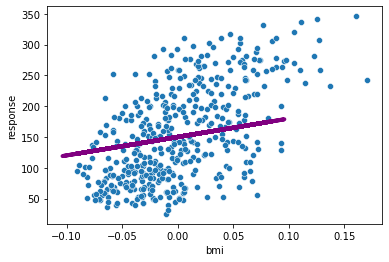

In [15]:
# This will display how well 1 specific feature predicts the response, using R2

import seaborn as sns
sns.scatterplot(df_diabetes['bmi'], df_diabetes['response']);
plt.plot(x_test, y_pred, color = 'purple', linewidth=4)

In [57]:
# this tells us how important every feature is in predicting the response

from itertools import chain

feature_importance = linreg.coef_
feature_importance = list(chain.from_iterable(feature_importance))
print(feature_importance)

[-1.0522512634577021, 24.95873576732496, 17.140666935195327, -13.249048841190175, -34.38058204287571, 17.22894542570307, 3.4885294606893997, 12.840078665016454, 34.17653940771685, 1.3155355250930505]


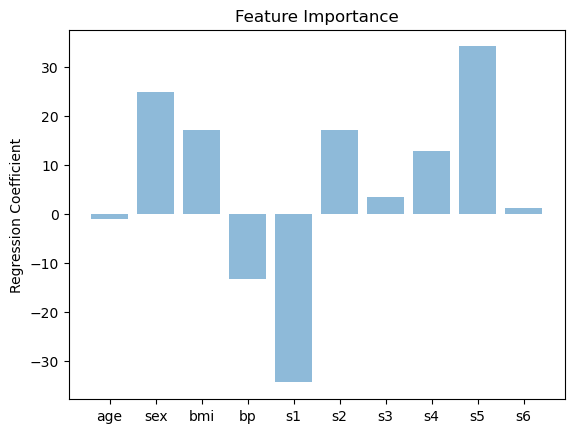

[-1.0522512634577021, 24.95873576732496, 17.140666935195327, -13.249048841190175, -34.38058204287571, 17.22894542570307, 3.4885294606893997, 12.840078665016454, 34.17653940771685, 1.3155355250930505]


In [58]:
# this is using the regression coefficient to measure importance, instead of using R2.
# has been scaled in code above, as we are using all the features we need to standardise the metrics
# so the features can be easily compared

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

features = ('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')

y_pos = np.arange(len(features))

plt.bar(y_pos, feature_importance, align = 'center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Regression Coefficient')
plt.title('Feature Importance')
plt.show()
print(feature_importance)